# **Зад 1. RGB to YMC**

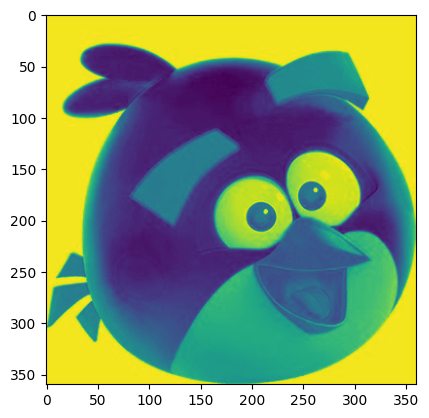

In [1]:
import numpy as np
from PIL import Image

img = Image.open("bird.jpg").convert("RGB")
pixels = np.array(img, dtype=float)

B = np.array([[0, 1, 1],    # Y = G + B
              [1, 0, 1],    # M = R + B
              [1, 1, 0]])   # C = R + G

pixels_new = np.dot(pixels, np.linalg.inv(B))

pic_new = pixels_new[:, :, 0] # едноканална визуализация

import matplotlib.pyplot as plt
plt.imshow(pic_new)
plt.show()

# **Зад 2. Edit a picture**

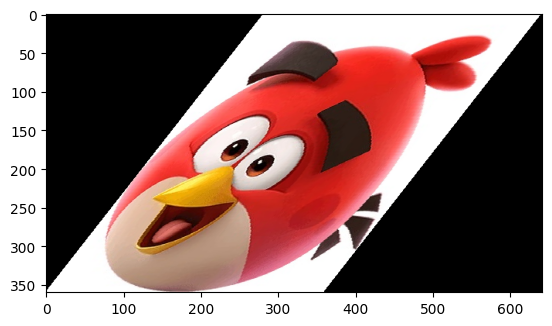

In [2]:
import numpy as np
from PIL import Image

img = Image.open("bird.jpg").convert("RGB")
pixels = np.array(img, dtype=float)

height, width, channels = pixels.shape

x, y = np.meshgrid(np.arange(width), np.arange(height))
coords = np.stack([x.flatten(), y.flatten(), np.ones_like(x.flatten())])

H = np.array([
    [-1, 0, 0],
    [ 0, 1, 0],
    [ 0, 0, 1]
])

theta = np.radians(45)
S = np.array([
    [1, theta, 0],
    [0, 1, 0],
    [0, 0, 1]
])

T = np.dot(H, S)
new_coords = np.dot(T, coords)

new_x = new_coords[0] - new_coords[0].min()
new_y = new_coords[1] - new_coords[1].min()

new_width = int(np.ceil(new_x.max())) + 1
new_height = int(np.ceil(new_y.max())) + 1

new_pixels = np.zeros((new_height, new_width, channels), dtype=np.uint8)

new_pixels[new_y.astype(int), new_x.astype(int)] = pixels[y.flatten(), x.flatten()]

new_img = Image.fromarray(new_pixels)

import matplotlib.pyplot as plt
plt.imshow(new_img)
plt.show()

# **Зад 3. Алгоритъм на Gram-Schmidt**

In [12]:
import numpy as np

def gs_coef(v1, v2):
    return np.dot(v2, v1) / np.dot(v1, v1) # coef = v1.v2/v2.v1

def multiply(coef, v):
    return np.array(v) * coef # proj_v1(v2) = coef.v1

def proj(v1, v2):
    return multiply(gs_coef(v1, v2), v1) # proj_v1(v2) = (v1.v2/v2.v1).v1

def gs(X):
    Y = [] # ортонормираните вектори
    for i in range(len(X)):
        temp = np.array(X[i])
        for y in Y:
            proj_vec = proj(y, temp) # проекцията на temp върху у
            temp = temp - proj_vec # вадим проекцията от temp
        Y.append(temp)
    return np.array(Y)

test = np.array([[1.0, 1.0, 0.0], [1.0, 3.0, 1.0], [2.0, -1.0, 1.0]])
print(gs(test))

[[ 1.          1.          0.        ]
 [-1.          1.          1.        ]
 [ 0.83333333 -0.83333333  1.66666667]]


# **Зад 4. Power Iteration (Von Mises Iteration)**

In [21]:
import numpy as np

def power_iteration(A, num_iterations: int):
    b_k = np.random.rand(A.shape[1])
    for _ in range(num_iterations):
        b_k1 = np.dot(b_k, A) # np.dot(A, b_k)
        b_k = b_k1 / np.linalg.norm(b_k1)
    return b_k

power_iteration(np.array([[0.5, 0.5], [0.2, 0.8]]), 10)

array([0.37139117, 0.92847649])

# **Зад 5. LU Decomposition**

In [20]:
import numpy as np

def luDecompose(A):
    # Не проверяваме дали е квадратна матрица
    aRows, aCols = np.shape(A)
    if aRows != aCols:
        return

    if type(A) != np.ndarray:
        return

    n = aRows

    lower = np.zeros([n, n], dtype="float64")
    upper = np.zeros([n, n], dtype="float64")

    for i in range(n):
        for k in range(i, n):
            sum = 0
            for j in range(i):
                sum += lower[i, j] * upper[j, k]
            upper[i, k] = A[i, k] - sum # пропускаме

        for k in range(i, n):
            if i == k:
                lower[i, i] = 1 # 1-ца вместо 0-ла 
            else:
                sum = 0
                for j in range(i):
                    sum += lower[k, j] * upper[j, i] # индексите j и i са разменени
                lower[k, i] = (A[k, i] - sum) / upper[i, i]

    return lower, upper

A = np.array([[2, -1, -2],
              [-4, 6, 3],
              [-4, -2, 8]], dtype=float)

L, U = luDecompose(A)
print(L, "\n", U)

[[ 1.  0.  0.]
 [-2.  1.  0.]
 [-2. -1.  1.]] 
 [[ 2. -1. -2.]
 [ 0.  4. -1.]
 [ 0.  0.  3.]]


# **Зад 6. Google's PageRank Algorithm**

In [4]:
import numpy as np

def build_L(A):
    num_nodes = A.shape[0]
    L = np.zeros_like(A, dtype=float)

    for j in range(num_nodes):
        col_sum = np.sum(A[:, j])
        if col_sum == 0:
            L[:, j] = 1.0 / num_nodes
        else:
            L[:, j] = A[:, j] / col_sum
    return L

def pagerank(A, damp_f=0.85, max_iter=100):
    num_nodes = A.shape[0]
    L = build_L(A)
    r = np.ones(num_nodes) / num_nodes

    for i in range(max_iter):
        new_r = damp_f * np.dot(L, r) + (1 - damp_f) / num_nodes
        if np.allclose(new_r, r):
            break
        r = new_r

    return r

A = np.array([
    [0, 1, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 1, 0]
])

print(pagerank(A))

[0.23472081 0.23202668 0.23202668 0.30122583]


# **Зад 7. Block Matrix Multiplication**

In [5]:
import numpy as np
import time

N = 512           
BLOCK_SIZE = 64 

A = np.random.rand(N, N)
B = np.random.rand(N, N)

def block_multiply_slow(A, B, block_size):
    N = len(A)
    C = [[0.0]*N for _ in range(N)]
    for i0 in range(0, N, block_size):
        for j0 in range(0, N, block_size):
            for k0 in range(0, N, block_size):
                for i in range(i0, min(i0+block_size, N)):
                    for j in range(j0, min(j0+block_size, N)):
                        sum_val = 0
                        for k in range(k0, min(k0+block_size, N)):
                            sum_val += A[i][k] * B[k][j]
                        C[i][j] += sum_val
    return C

def block_multiply_fast(A, B, block_size):
    N = A.shape[0]
    C = np.zeros((N, N))
    for i0 in range(0, N, block_size):
        for j0 in range(0, N, block_size):
            for k0 in range(0, N, block_size):                    # C[j0:i0+block_size, i0:j0+block_size]
                C[i0:i0+block_size, j0:j0+block_size] += \
                    np.dot(A[i0:i0+block_size, k0:k0+block_size], # A[j0:j0+block_size, k0:k0+block_size]
                           B[k0:k0+block_size, j0:j0+block_size]) # B[k0:k0+block_size, i0:i0+block_size]
    return C

start = time.time()
C_python = block_multiply_slow(A.tolist(), B.tolist(), BLOCK_SIZE)
end = time.time()
print(f"Slow multiplication: {end - start:.4f} сек")

start = time.time()
C_numpy = block_multiply_fast(A, B, BLOCK_SIZE)
end = time.time()
print(f"Fast multiplication: {end - start:.4f} сек")

Slow multiplication: 7.2231 сек
Fast multiplication: 0.0127 сек


# **Зад 8. Hadamard product**

In [1]:
import numpy as np

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[10,20,30],[40,50,60], [70,80,90]])

def hadamard_product(a, b, out=None):
    return np.multiply(a, b, out=out)

out = np.empty_like(A)
hadamard_product(A, B, out=out)
print(out)

[[ 10  40  90]
 [160 250 360]
 [490 640 810]]
